# Tugas Q-Learning dengan Arah
---
M. Naufal Irham Ramdhani

10818019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Buat terlebih dahulu peta CAS sederhana

Untuk tembok, di berikan nilai reward -1, sedangkan koridor yang bisa dilewati bernilai reward 1

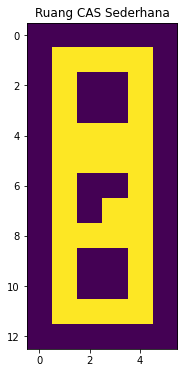

In [2]:
#tembok
x = 11 #jumlah tembok vertikal kanan-kiri
y = 4  #jumlah embok Horizontal atas-bawah

#field (tempat robot bergerak)
field = np.ones((x,y))

#playground adalah lingkungan yang didiami oleh robot
playground = np.pad(field, ((1, 1), (1, 1)), constant_values=-1)

#Beberapa modifikasi pada playground karena ada bagian tengah CAS yang tidak bisa dilewati
playground[2:4,2:4]=-1
playground[6:8,2]=-1
playground[6,3]=-1
playground[9:11,2:4]=-1

#Munculkan peta sederhana dari CAS
plt.figure(figsize=(12, 6))
plt.title("Ruang CAS Sederhana")
plt.imshow(playground)
plt.show()

Berikut adalah nama-nama inisial dosen dan koordinat lokasi ruangannya

In [6]:
lokasi = {'I' :[11, 0], 'W' :[11, 5], 'K':[ 8, 0], 'TU':[ 7, 3], 
          'D' :[ 8, 5], 'R1':[ 6, 5], 'U':[ 5, 0], 'L' :[ 4, 2], 
          'N' :[ 5, 5], 'R2':[ 6, 0], 'H':[ 1, 0], 'E' :[ 1, 5]}

akronim  = {'I':'Bu Irawati', 'W':'Pak Wono', 'K':'Pak Khreshna', 'TU': 'Tata Usaha MA', 
            'D':'Bu Dumaria', 'R1':'Rest Room 1', 'U':'Bu Utriweni', 'L':'Lift', 'N':'Bu Nuning', 
            'R2': 'Rest Room 2', 'H':'Pak Hendra', 'E':'Pak Edy Soewono'}

## Algoritma Q learning

Dibawah ini adalah algoritma dari Q learning. Penjelasan mengenai code perbaris ada dibawah ini. Perhatikan bahwa pada code yang saya buat, istilah "lokasi" atau "posisi" berbeda dengan "state". Untuk percobaan, disini kita ingin memindahkan robot dari koordinat [1,4] ke ruangan Bu Irawati

In [4]:
#all_state adalah semua state yang dapat ditempati oleh robot
all_state      = [[i,j] for i in range(playground.shape[0]) for j in range(playground.shape[1])]

#Dibawah ini adalah tabel Q
Q = np.zeros([len(all_state),4])

#Disini kita menentukan robot mulai dan berakhir dimana dimana
start =  [1,4] #START
target = "I"

finish = lokasi[target] #FINISH
playground[finish[0], finish[1]] = 20 #Untuk tempat finish, rewardnya diperbesar agar robot tertarik untuk datang kesana

environment = np.copy(playground)

#Selain reward pada tempat finish diperbesar, kita juga perlu memperbesar reward di sekitar finish
#Hal ini dikarenakan agar robot jauh lebih tertarik ke arah finish
#'If' yang banyak dibawah ini sebenarnya hanya untuk memastikan bahwa yang kita perbesar rewardnya bukanlah dinding
if playground[finish[0]+1, finish[1]] > 0: 
    playground[finish[0]+1, finish[1]] = 2

if playground[finish[0]-1, finish[1]] > 0:
    playground[finish[0]-1, finish[1]] = 2

if playground[finish[0], finish[1]+1] > 0:
    playground[finish[0], finish[1]+1] = 2

if playground[finish[0], finish[1]-1] > 0:
    playground[finish[0], finish[1]-1] = 2

# Setting parameter γ and α untuk Q-Learning
γ = 0.9
α = 0.2

epochs = 25000

for i in range(epochs):
    #Pilih secara acak koordinat mula-mula
    state_loc    = random.choice(all_state)

    #Pastikan state yang dipilih secara acak bukanlah dinding
    while playground[state_loc[0], state_loc[1]] == -1: #selama yang dipilih masih tembok, terus lakukan pemilihan state sampai yang dipilih bukan dinding
        state_loc    = random.choice(all_state) 
    state        = all_state.index(state_loc) #ini adalah state dari koordinat yang telah terpilih barusan
    
    #choose next action : pilih arah selanjutnya secara acak
    #Robot dapat memilih bergerak keatas, bawah, kanan, dan kiri. Maka dari itu disini kita cari tahu reward yang didapat dari pergerakan ke arah-arah tersebut
    #Pastikan bahwa jika bergerak kearah dinding kita anggap gerakan tersebut memberikan reward 0 agar nantinya tidak terpilih sebagai action
    atas         = playground[state_loc[0]-1, state_loc[1]]*(state_loc[0] != 0 )
    bawah        = playground[state_loc[0]+1, state_loc[1]]*(state_loc[0] != 12)
    kanan        = playground[state_loc[0], state_loc[1]+1]*(state_loc[1] != 5 )
    kiri         = playground[state_loc[0], state_loc[1]-1]*(state_loc[1] != 0 )

    sekitar_agen = np.array([atas, bawah, kanan, kiri]) #kumpulan gerakan yang mungkin. 1:atas, 2:bawah, 3:kanan, 4:kiri

    action       = random.choice(np.where(sekitar_agen > 0)[0])  #pilih gerakan (action) secara acak

    #perform action:
    gerak          = np.array([-1,0]*(action == 0)+[1,0]*(action == 1)+[0,1]*(action == 2)+[0,-1]*(action == 3)) #pergerakan robot
    next_state_loc = [x + y for x, y in zip(state_loc, gerak)] #disini terjadi perpindahan posisi robot akibat gerakan (action) yang diambil
    next_state     = all_state.index(next_state_loc) #ini adalah state yang ditempati setelah robot berpindah

    #Hitung temporal difference
    TD = (playground[state_loc[0], state_loc[1]] + γ*Q[next_state, np.argmax(Q[next_state,:])]) - Q[state, action]
    Q[state, action] += α*TD #update Q

#Untuk code dibawah ini sebenarnya tidak berbeda jauh dengan code pada Q-learning oleh pak Syamsudin. Hanya saja ada beberapa modifikasi agar codenya bisa di run

lintasan = [start]
nextloc  = start #START

j = 0
d = 16 #ini adalah maksimum gerakan yang diperbolehkan (didapat dari panjang lintasan terpanjang yang mungkin tanpa bolak-balik)

while (all_state.index(nextloc) != all_state.index(finish)):  #akan dipilih location berikutnya
    initial  = all_state.index(nextloc) 
    action   = np.argmax(Q[initial,:])  #pilih gerakan berdasarkan nilai Q terbesar
    gerak    = np.array([-1,0]*(action == 0)+[1,0]*(action == 1)+[0,1]*(action == 2)+[0,-1]*(action == 3))
    nextloc  = [x + y for x, y in zip(nextloc, gerak)]
    lintasan.append(nextloc)
    j += 1
    if j > d:  #belum pernah nyampe finish
        print('Belum nyampe finish, perbesar epochs')
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


# Hasil Learning
Hasil dari learning ini adalah berupa plot pergerakan robot di peta CAS

Pergerakan robot dari lokasi [1, 4] ke Bu Irawati


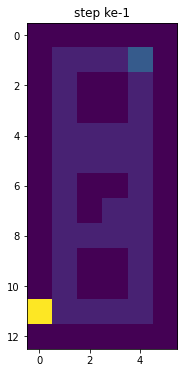

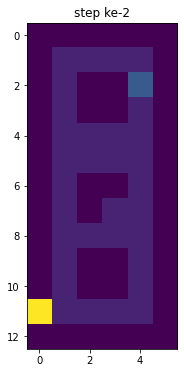

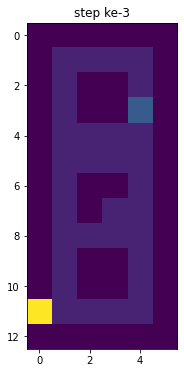

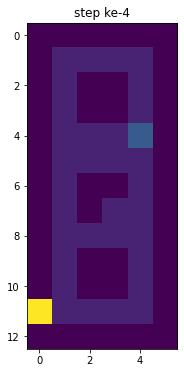

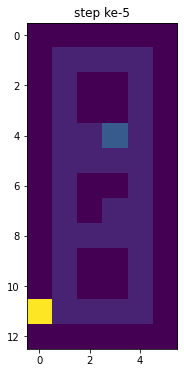

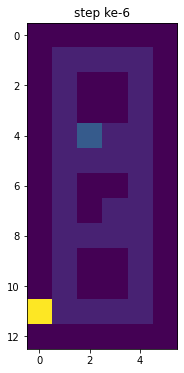

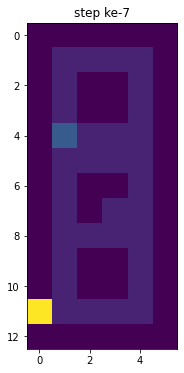

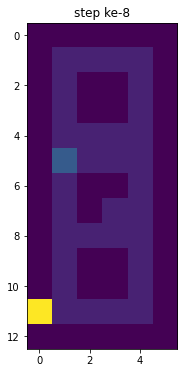

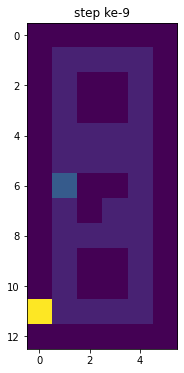

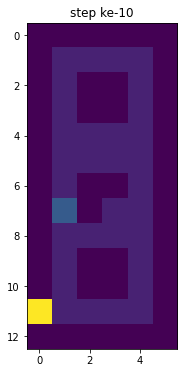

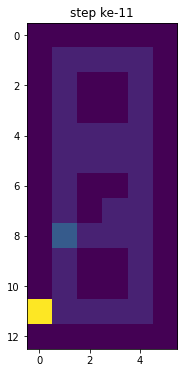

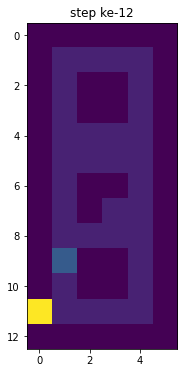

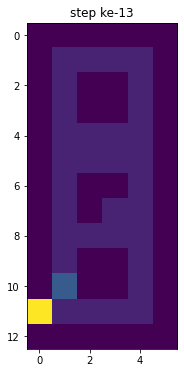

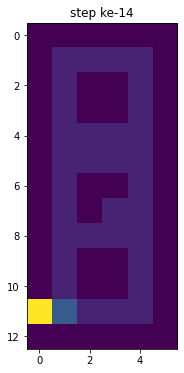

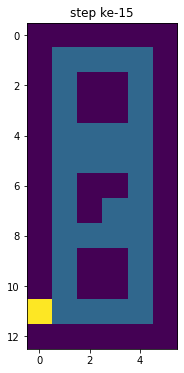

Robot berhasil sampai


In [12]:
frame = []
for i in lintasan:
    mod             = np.copy(environment)
    mod[i[0], i[1]] = 5
    frame.append(mod)


print("Pergerakan robot dari lokasi", start ,"ke", akronim[target])


for i in range(len(frame)):
    plt.figure(figsize=(12, 6))
    plt.title("step ke-"+str(i+1))
    plt.imshow(frame[i])
    plt.show()

print("Robot berhasil sampai")